In [4]:
print("--- Defined Functions and Derivatives ---")
print(f"Problem A: f(x) = x^5 + x - 1             | f'(x) = 5x^4 + 1")
print(f"Problem B: f(x) = x^5 + 5x^3 - 4x + 1     | f'(x) = 5x^4 + 15x^2 - 4")
print(f"Problem C: f(x) = x^5 + 2x^4 - x - 3      | f'(x) = 5x^4 + 8x^3 - 1")
print(f"Problem D: f(x) = x^5 - 10                | f'(x) = 5x^4")
print(f"Problem E: f(x) = x^5 + 2x^2 + x - 0.5    | f'(x) = 5x^4 + 4x + 1")

--- Defined Functions and Derivatives ---
Problem A: f(x) = x^5 + x - 1             | f'(x) = 5x^4 + 1
Problem B: f(x) = x^5 + 5x^3 - 4x + 1     | f'(x) = 5x^4 + 15x^2 - 4
Problem C: f(x) = x^5 + 2x^4 - x - 3      | f'(x) = 5x^4 + 8x^3 - 1
Problem D: f(x) = x^5 - 10                | f'(x) = 5x^4
Problem E: f(x) = x^5 + 2x^2 + x - 0.5    | f'(x) = 5x^4 + 4x + 1


In [1]:
# ==============================================================================
# Task 2: Implementation of Algorithms (Newton, Secant, False Position)
# ==============================================================================

import pandas as pd
import numpy as np

# We use pandas to create clean, readable tables for the iteration history.
# These options prevent the output from being cut off or wrapped weirdly in the console.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# ------------------------------------------------------------------------------
# 2.1 NEWTON-RAPHSON METHOD
# ------------------------------------------------------------------------------
# HOW IT WORKS:
# This method uses the function f(x) and its derivative f'(x).
# It draws a tangent line at the current guess and finds where that line hits the x-axis.
# Formula: x_new = x_old - f(x_old) / f'(x_old)
# ------------------------------------------------------------------------------
def newton_raphson(func, deriv, x0, tol=1e-10, max_iter=50):
    history = []
    x_curr = x0
    
    for i in range(max_iter):
        f_val = func(x_curr)
        f_prime = deriv(x_curr)

        if abs(f_prime) < 1e-12:
            print(f"ERROR: Derivative close to zero at x = {x_curr:.6f}")
            break

        x_next = x_curr - (f_val / f_prime)
        
        error = abs(x_next - x_curr)

        history.append({
            "Iter": i + 1,
            "x_i": float(f"{x_curr:.6f}"),
            "f(x)": float(f"{f_val:.6f}"),
            "f'(x)": float(f"{f_prime:.6f}"),
            "Error": float(f"{error:.6f}")
        })

        x_curr = x_next
        
        if error < tol:
            break
            
    return x_curr, pd.DataFrame(history)

# ------------------------------------------------------------------------------
# 2.2 SECANT METHOD
# ------------------------------------------------------------------------------
# HOW IT WORKS:
# Similar to Newton's method, but it doesn't need the derivative.
# Instead, it approximates the slope using two previous points (x0, x1).
# It draws a "secant line" through these points to find the next guess.
# ------------------------------------------------------------------------------
def secant_method(func, x0, x1, tol=1e-10, max_iter=50):
    history = []
    x_prev = x0
    x_curr = x1
    
    for i in range(max_iter):
        f_curr = func(x_curr)
        f_prev = func(x_prev)

        if abs(f_curr - f_prev) < 1e-12:
            print("ERROR: Division by zero risk (flat secant line).")
            break

        x_next = x_curr - f_curr * ((x_curr - x_prev) / (f_curr - f_prev))
        
        error = abs(x_next - x_curr)

        history.append({
            "Iter": i + 1,
            "x_(i-1)": float(f"{x_prev:.6f}"),
            "x_i": float(f"{x_curr:.6f}"),
            "f(x)": float(f"{f_curr:.6f}"),
            "Error": float(f"{error:.6f}")
        })

        x_prev = x_curr
        x_curr = x_next
        
        if error < tol:
            break
            
    return x_curr, pd.DataFrame(history)

# ------------------------------------------------------------------------------
# 2.3 FALSE POSITION METHOD (REGULA FALSI)
# ------------------------------------------------------------------------------
# HOW IT WORKS:
# This is a "bracketing" method. It requires two initial points [a, b] 
# that surround the root (f(a) and f(b) must have opposite signs).
# It draws a line between them, finds the intercept (c), and then replaces
# whichever side (a or b) has the same sign as f(c).
# ------------------------------------------------------------------------------
def false_position(func, a, b, tol=1e-10, max_iter=50):
    history = []
    
    if func(a) * func(b) >= 0:
        print(f"ERROR: Invalid bracket [{a}, {b}]. f(a) and f(b) must have opposite signs.")
        return None, pd.DataFrame()

    c_old = a 
    
    for i in range(max_iter):
        fa = func(a)
        fb = func(b)
        
        #  Calculate the root estimate 'c' (Same math formula as Secant
        c = b - fb * ((b - a) / (fb - fa))
        fc = func(c)
        
        error = abs(c - c_old)
        
        history.append({
            "Iter": i + 1,
            "a": float(f"{a:.6f}"),
            "b": float(f"{b:.6f}"),
            "x_root": float(f"{c:.6f}"),
            "f(x)": float(f"{fc:.6f}"),
            "Error": float(f"{error:.6f}")
        })
        
        if error < tol or abs(fc) < 1e-12:
            break
    
        if fa * fc < 0:
            b = c 
        else:
            a = c 
            
        c_old = c
        
    return c, pd.DataFrame(history)

# ==============================================================================
# MAIN EXECUTION
# ==============================================================================
if __name__ == "__main__":
    
    # DATA STRUCTURE:
    # We use a Dictionary to store all test functions.
    # Key: Function Name (A, B, C...)
    # Value: A list containing:
    #   [0] The Function (lambda x)
    #   [1] The Derivative (lambda x) - needed for Newton-Raphson
    #   [2] Start of Bracket (a) - needed for False Position
    #   [3] End of Bracket (b) - needed for False Position
    functions_data = {
        "A": [lambda x: x**5 + x - 1,             lambda x: 5*x**4 + 1,            0, 1],
        "B": [lambda x: x**5 + 5*x**3 - 4*x + 1,  lambda x: 5*x**4 + 15*x**2 - 4,  0, 1], 
        "C": [lambda x: x**5 + 2*x**4 - x - 3,    lambda x: 5*x**4 + 8*x**3 - 1,   1, 2],
        "D": [lambda x: x**5 - 10,                lambda x: 5*x**4,                1, 2],
        "E": [lambda x: x**5 + 2*x**2 + x - 0.5,  lambda x: 5*x**4 + 4*x + 1,      0, 1]
    }

    # SPECIAL FIX FOR FUNCTION B:
    # Function B has roots near 0.2 and -0.8.
    # If we bracket [0, 1], f(0)=1 and f(1)=3. Both positive!
    # False Position requires one positive and one negative.
    # We manually change the bracket to [-1, 1] to ensure it works.
    functions_data["B"][2] = -1 
    functions_data["B"][3] = 1

    # Loop through every function in our list
    for name, (func, deriv, fp_a, fp_b) in functions_data.items():
        print(f"\n{'='*80}")
        print(f"ANALYSIS OF FUNCTION {name}")
        print(f"{'='*80}")

        # --- RUN NEWTON-RAPHSON ---
        print(f"\n>>> METHOD 1: NEWTON-RAPHSON (x0 = 1.0)")
        print(f"{'-'*40}")
        root_nr, table_nr = newton_raphson(func, deriv, x0=1.0)
        print(table_nr.to_string(index=False))
        print(f"\nConverged Root: {root_nr:.6f}")

        # --- RUN SECANT METHOD ---
        print(f"\n\n>>> METHOD 2: SECANT METHOD (x0 = 0, x1 = 1)")
        print(f"{'-'*40}")
        root_sec, table_sec = secant_method(func, x0=0, x1=1)
        print(table_sec.to_string(index=False))
        print(f"\nConverged Root: {root_sec:.6f}")
        
        # --- RUN FALSE POSITION METHOD ---
        print(f"\n\n>>> METHOD 3: FALSE POSITION (Interval [{fp_a}, {fp_b}])")
        print(f"{'-'*40}")
        root_fp, table_fp = false_position(func, a=fp_a, b=fp_b)
        
        if root_fp is not None:
            print(table_fp.to_string(index=False))
            print(f"\nConverged Root: {root_fp:.6f}")
        
        print(f"\n{'.'*80}")


ANALYSIS OF FUNCTION A

>>> METHOD 1: NEWTON-RAPHSON (x0 = 1.0)
----------------------------------------
 Iter    x_i     f(x)     f'(x)    Error 
  1   1.000000 1.000000 6.000000 0.166667
  2   0.833333 0.235211 3.411265 0.068951
  3   0.764382 0.025329 2.706916 0.009357
  4   0.755025 0.000386 2.624857 0.000147
  5   0.754878 0.000000 2.623590 0.000000
  6   0.754878 0.000000 2.623590 0.000000

Converged Root: 0.754878


>>> METHOD 2: SECANT METHOD (x0 = 0, x1 = 1)
----------------------------------------
 Iter  x_(i-1)    x_i      f(x)     Error 
  1   0.000000 1.000000  1.000000 0.500000
  2   1.000000 0.500000 -0.468750 0.159574
  3   0.500000 0.659574 -0.215595 0.135899
  4   0.659574 0.795474  0.113988 0.047002
  5   0.795474 0.748472 -0.016630 0.005984
  6   0.748472 0.754456 -0.001104 0.000426
  7   0.754456 0.754882  0.000012 0.000004
  8   0.754882 0.754878 -0.000000 0.000000
  9   0.754878 0.754878 -0.000000 0.000000

Converged Root: 0.754878


>>> METHOD 3: FALSE POSITION

Generating Visualization Plots...

Processing Function A...


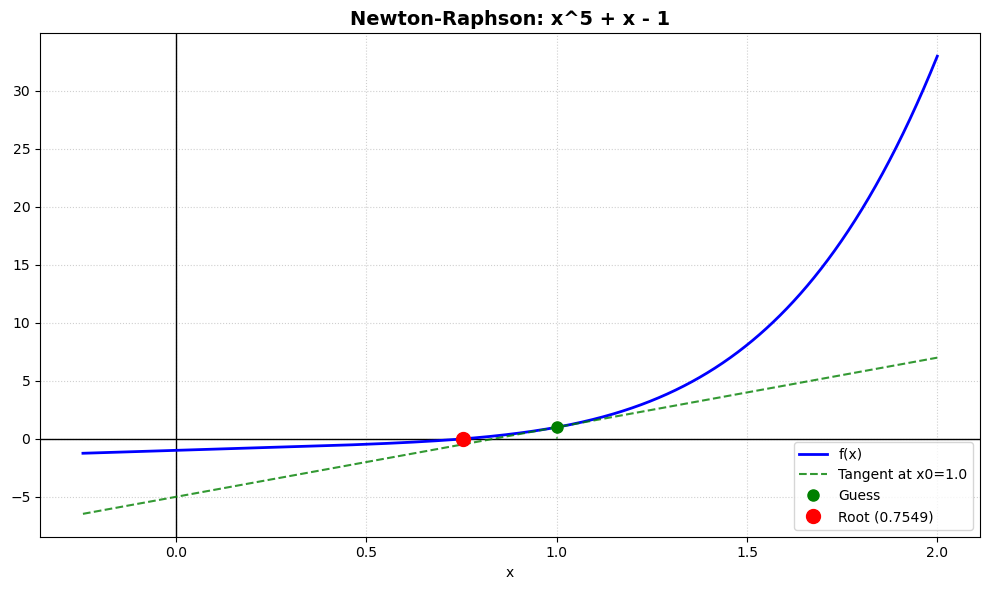

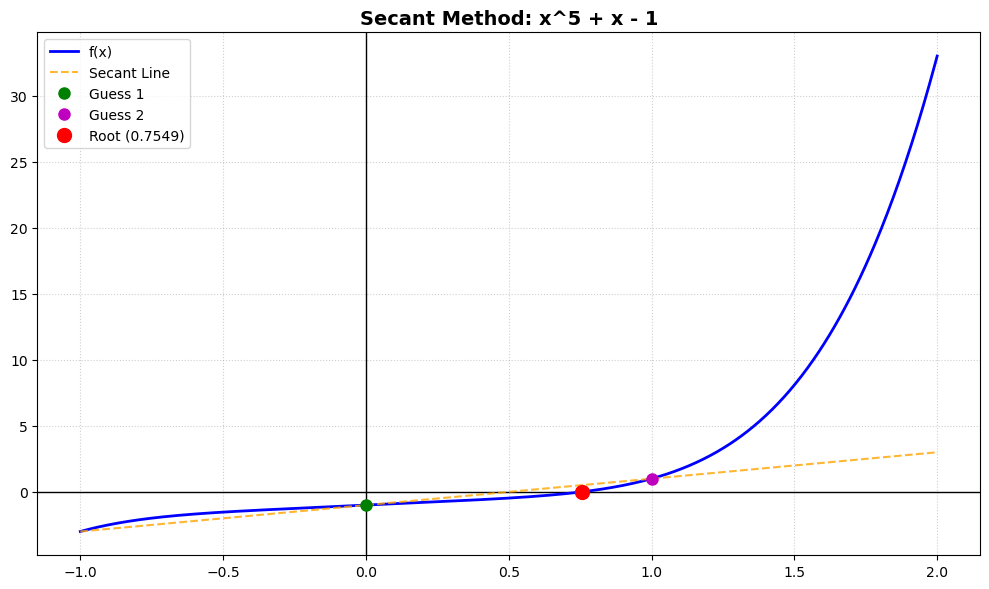

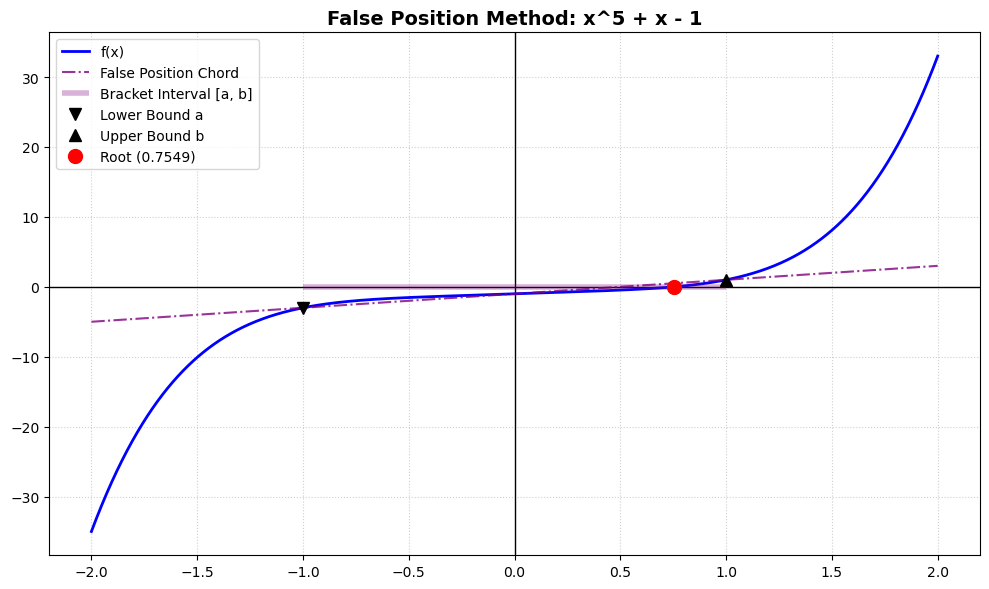

  -> Done with Function A
--------------------------------------------------
Processing Function B...


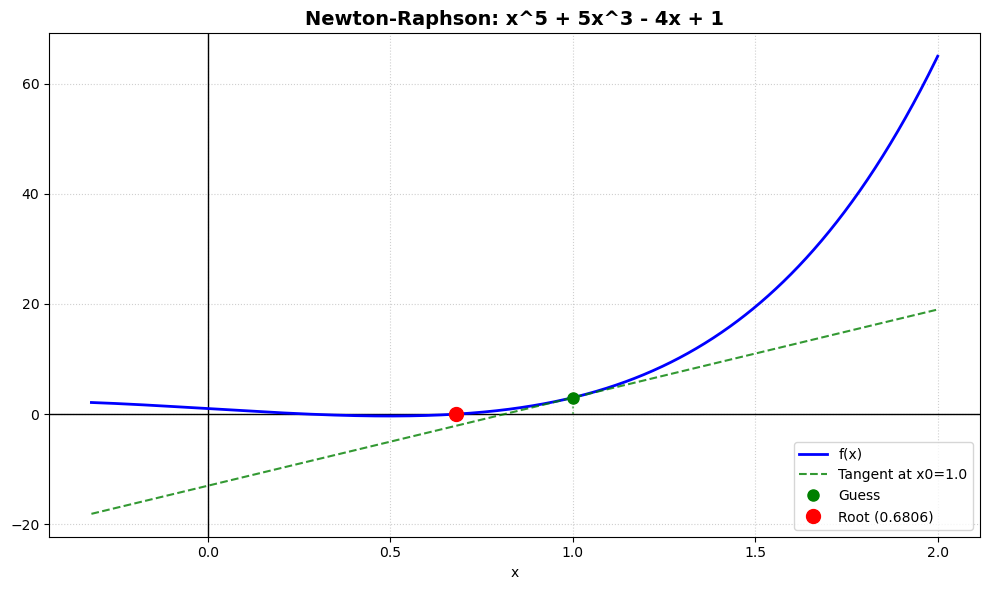

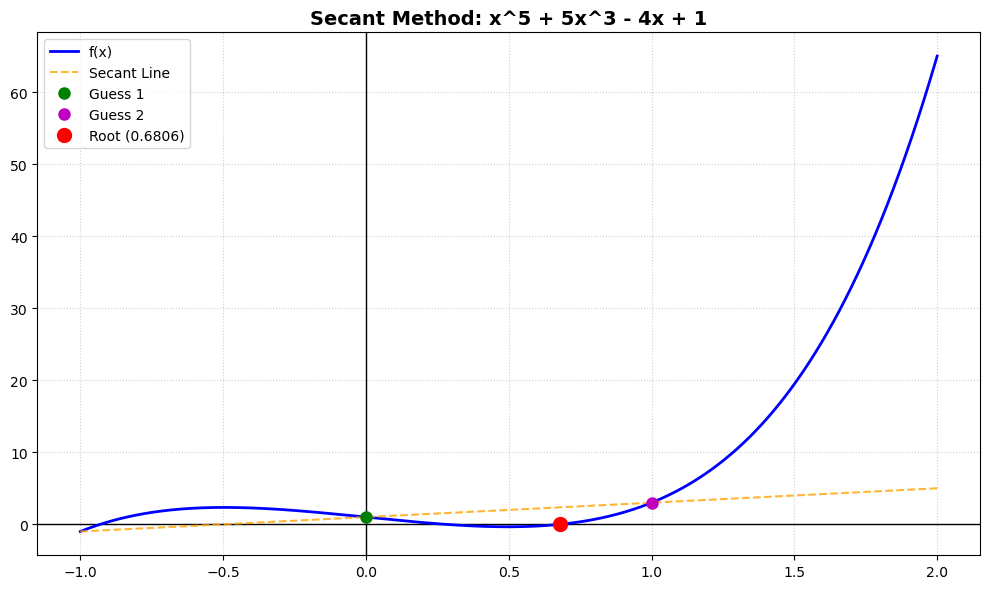

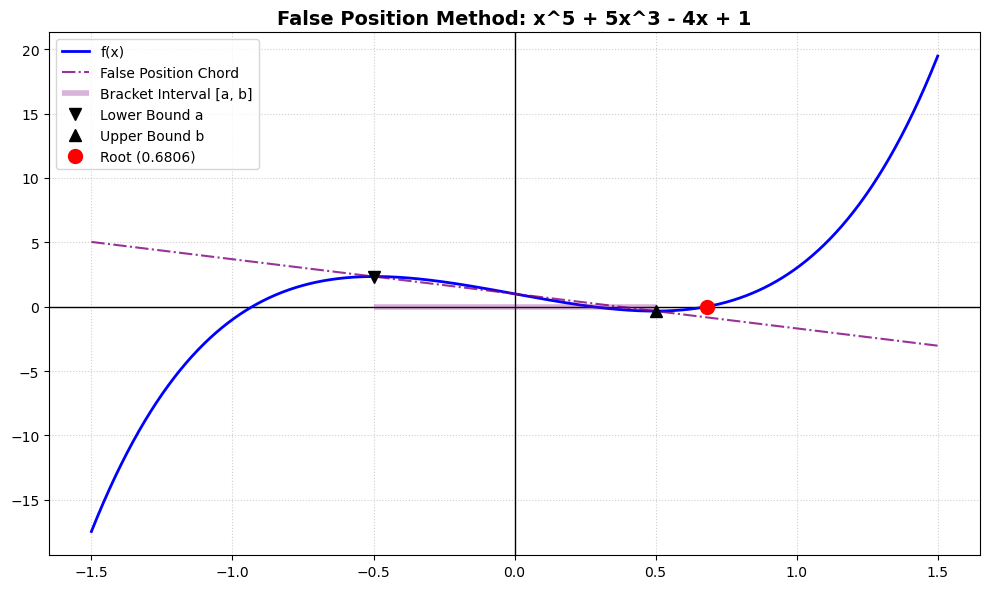

  -> Done with Function B
--------------------------------------------------
Processing Function C...


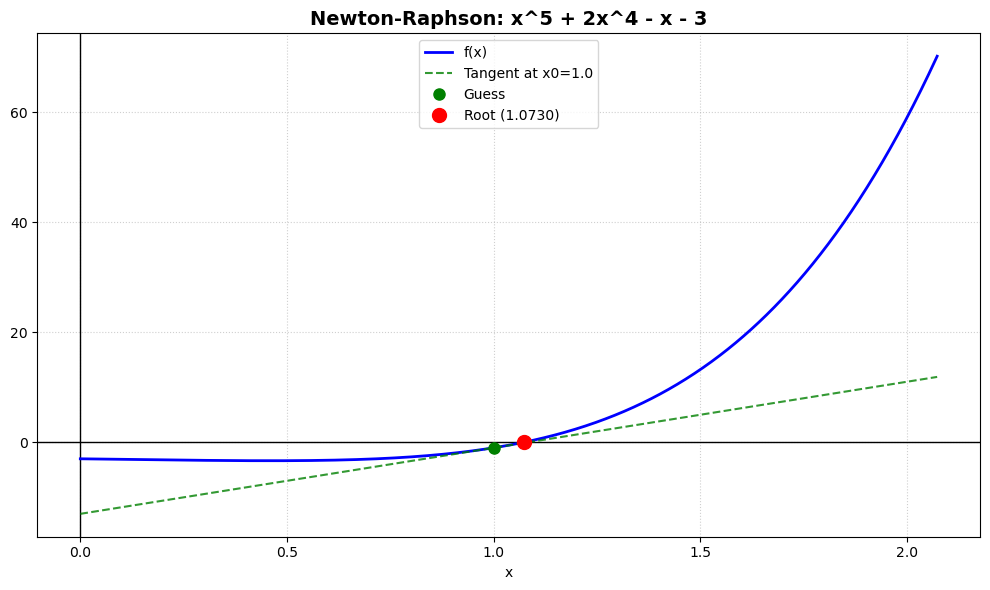

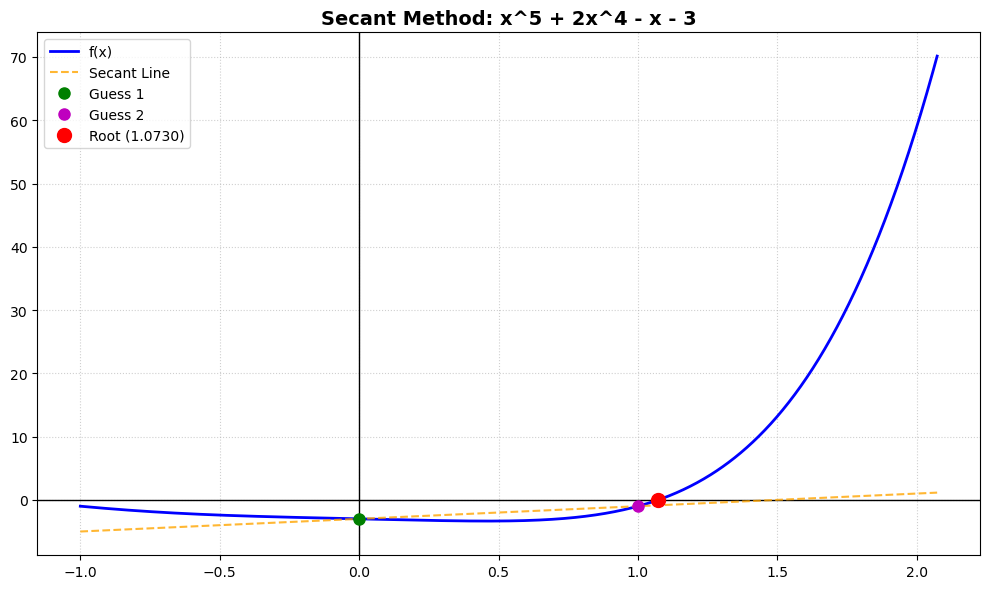

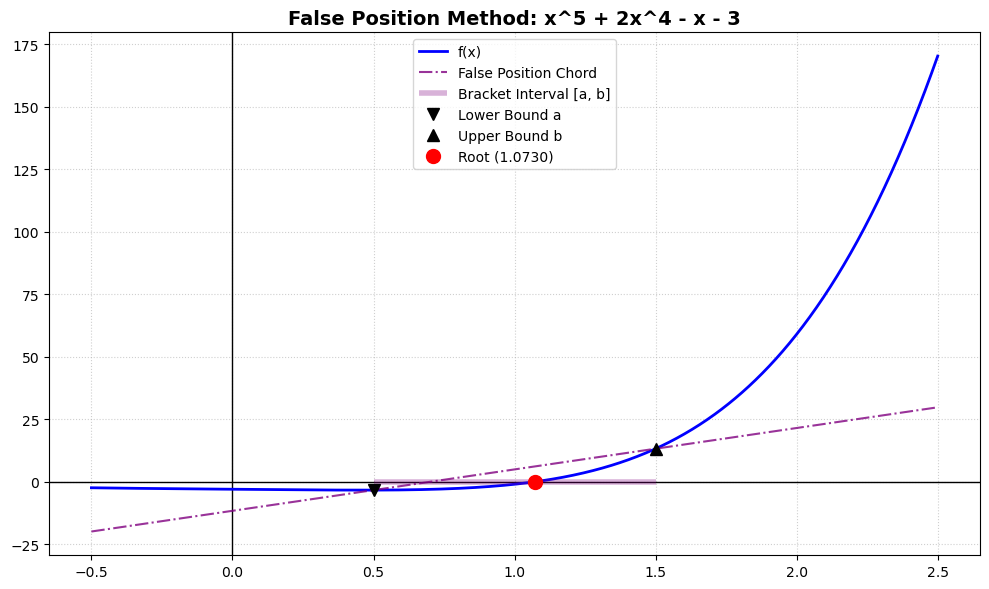

  -> Done with Function C
--------------------------------------------------
Processing Function D...


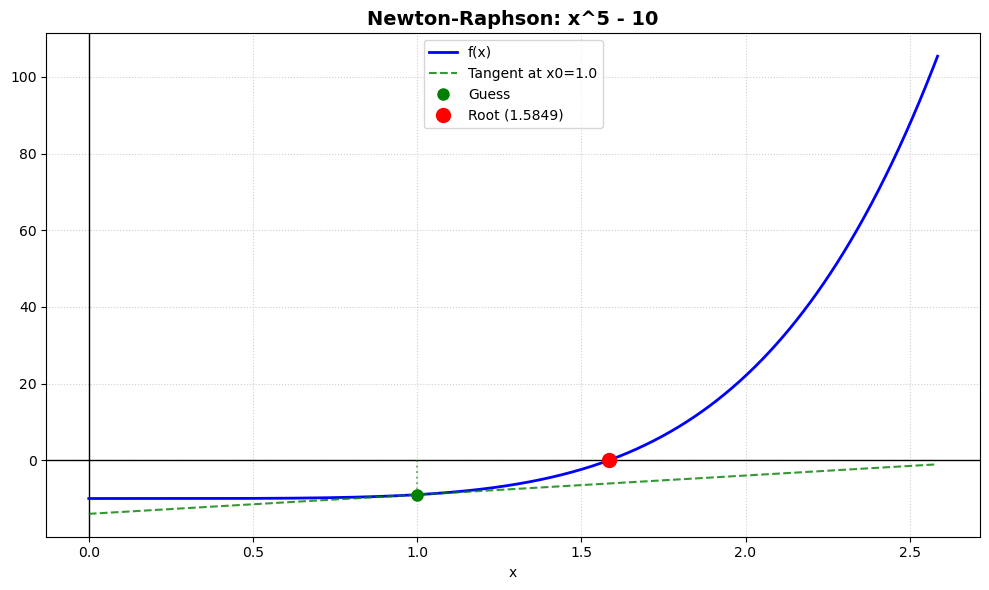

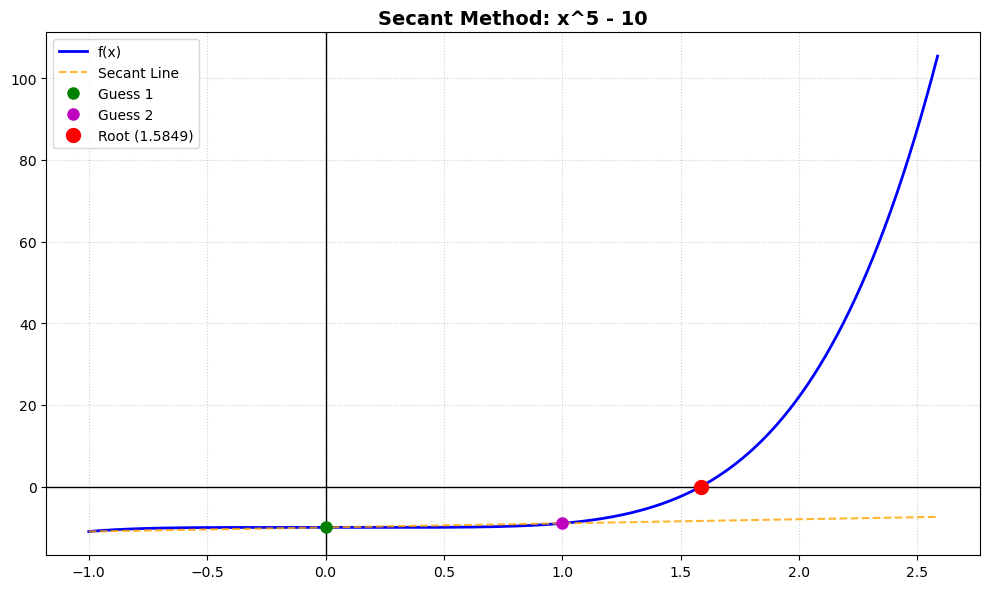

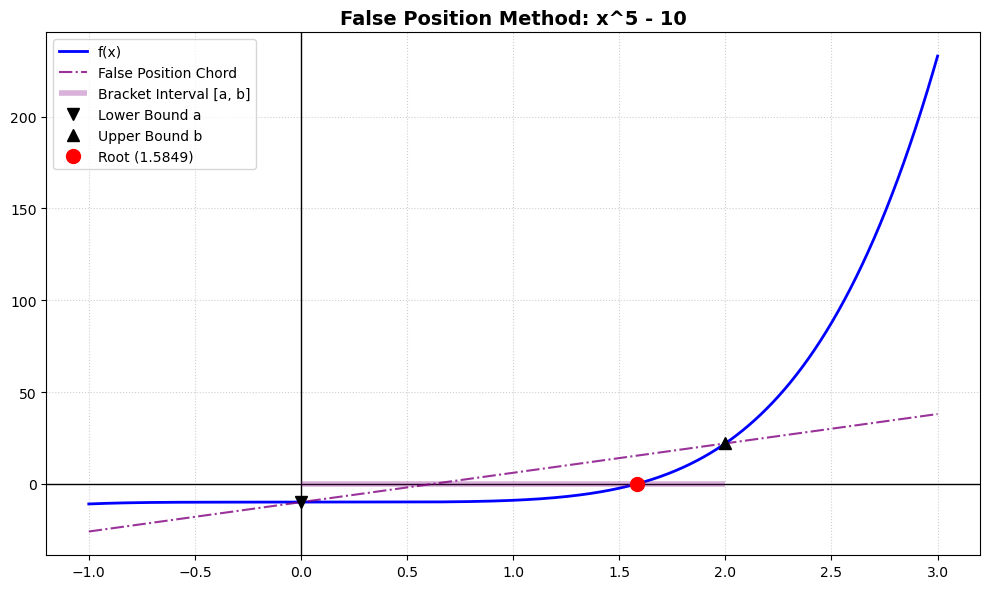

  -> Done with Function D
--------------------------------------------------
Processing Function E...


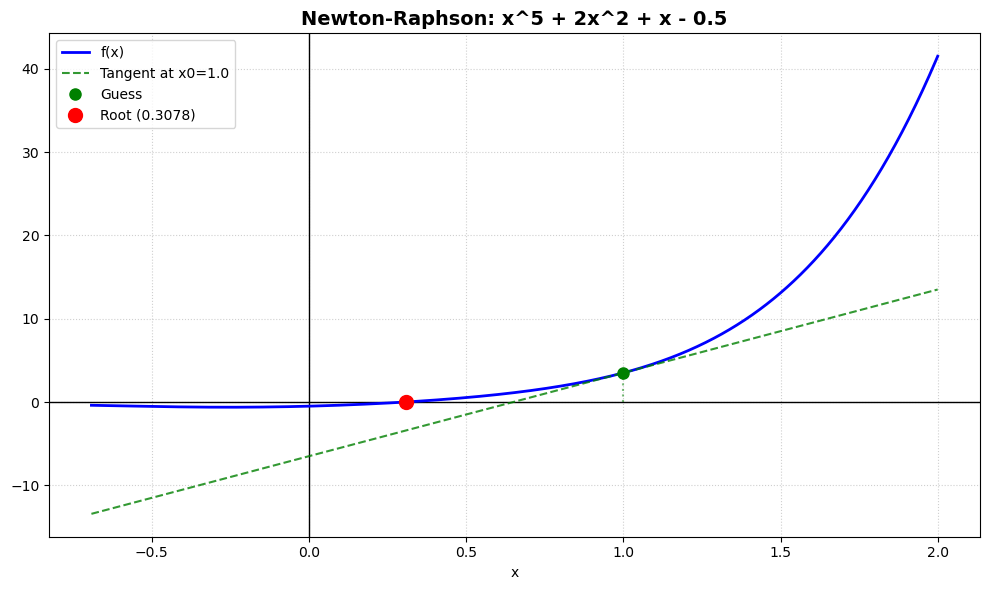

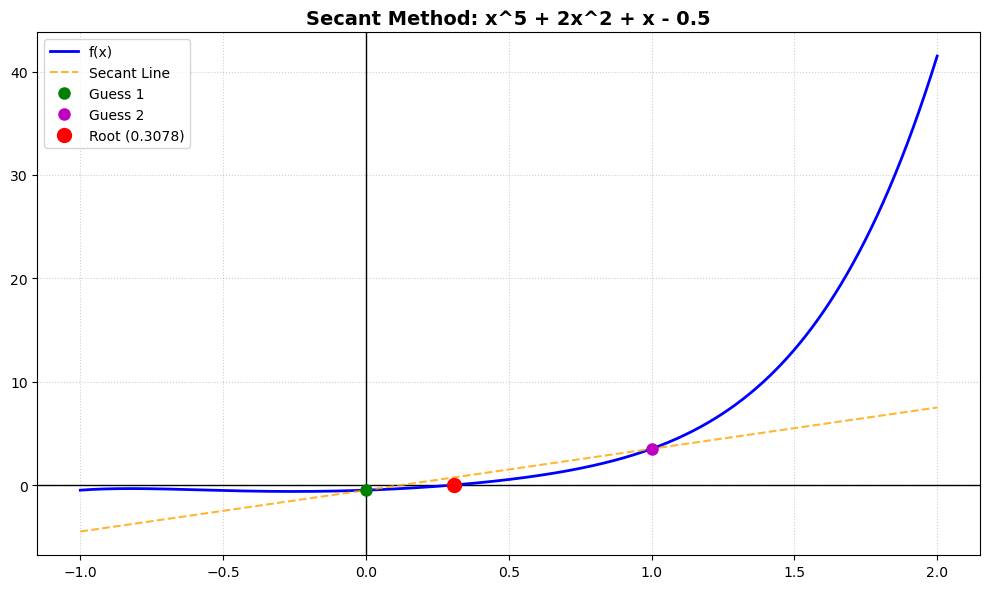

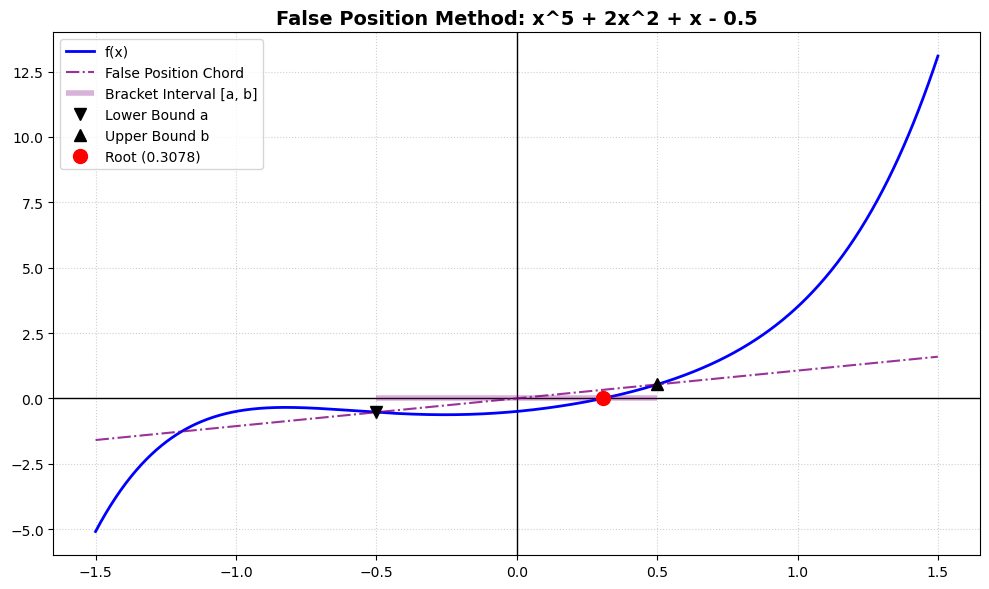

  -> Done with Function E
--------------------------------------------------


In [2]:
# ==============================================================================
# LABORATORY ACTIVITY 3: Root Finding Methods
# ==============================================================================

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1. HELPER: ROOT CALCULATOR
# ------------------------------------------------------------------------------
# WHY WE NEED THIS:
# To make the graphs look good, we need to know where the actual root is 
# beforehand so we can center the "camera" (the x-axis range) around it.
# We use a quick Newton-Raphson loop here just to get that target value.
# ------------------------------------------------------------------------------
def get_root(func, deriv, x0=1.0):
    x = x0
    for _ in range(20):
        try:
            x = x - func(x)/deriv(x)
        except ZeroDivisionError:
            break
    return x

# ------------------------------------------------------------------------------
# 2. HELPER: BRACKET FINDER
# ------------------------------------------------------------------------------
# WHY WE NEED THIS:
# False Position requires one point below the x-axis and one above.
# This function scans outward from the center to find a valid [a, b] bracket.
# ------------------------------------------------------------------------------
def find_valid_bracket(func, center=0):
    step = 0.5
    for i in range(1, 20):
        a, b = center - i*step, center + i*step
        if func(a) * func(b) < 0:
            return a, b
    return center - 1, center + 1 

# ------------------------------------------------------------------------------
# 3. PLOT: NEWTON-RAPHSON (Tangent Line Visualization)
# ------------------------------------------------------------------------------
# LOGIC:
# 1. Draw the function curve f(x).
# 2. Calculate the tangent line at the initial guess x0.
#    Slope m = f'(x0)
#    Equation: y = m(x - x0) + f(x0)
# 3. Mark the root and the guess to show how the line points to the root.
# ------------------------------------------------------------------------------
def plot_newton_visualization(func, deriv, x0, root, label):
    margin = 1.0
    start_x = min(root, x0) - margin
    end_x = max(root, x0) + margin
    x = np.linspace(start_x, end_x, 1000)
    y = func(x)

    plt.figure(figsize=(10, 6))
    
    plt.axhline(0, color='black', linewidth=1) # X-axis
    plt.axvline(0, color='black', linewidth=1) # Y-axis
    plt.plot(x, y, label=f'f(x)', color='blue', linewidth=2)

    y0 = func(x0)      
    slope = deriv(x0)   
    y_tangent = slope * (x - x0) + y0 
    
    plt.plot(x, y_tangent, '--', color='green', alpha=0.8, label=f'Tangent at x0={x0}')
    plt.plot(x0, y0, 'go', markersize=8, label='Guess')
    
    plt.vlines(x0, 0, y0, colors='green', linestyles='dotted', alpha=0.5)
    
    plt.plot(root, 0, 'ro', markersize=10, label=f'Root ({root:.4f})', zorder=5)

    plt.title(f"Newton-Raphson: {label}", fontsize=14, fontweight='bold')
    plt.xlabel("x")
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------------------
# 4. PLOT: SECANT METHOD (Secant Line Visualization)
# ------------------------------------------------------------------------------
# LOGIC:
# 1. Draw the function curve f(x).
# 2. Draw a line connecting two guess points (x0, f(x0)) and (x1, f(x1)).
#    Slope m = (y1 - y0) / (x1 - x0)
# 3. This line "cuts" (secants) the curve to point towards the root.
# ------------------------------------------------------------------------------
def plot_secant_visualization(func, x0, x1, root, label):
    margin = 1.0
    min_x = min(root, x0, x1) - margin
    max_x = max(root, x0, x1) + margin
    x = np.linspace(min_x, max_x, 1000)
    y = func(x)

    plt.figure(figsize=(10, 6))
    
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.plot(x, y, label=f'f(x)', color='blue', linewidth=2)

    y0, y1 = func(x0), func(x1)
    
    if abs(x1 - x0) > 1e-12:
        slope = (y1 - y0) / (x1 - x0)
        y_secant = slope * (x - x1) + y1
        plt.plot(x, y_secant, '--', color='orange', alpha=0.8, label=f'Secant Line')
    
    plt.plot(x0, y0, 'go', markersize=8, label='Guess 1')
    plt.plot(x1, y1, 'mo', markersize=8, label='Guess 2')
    plt.plot(root, 0, 'ro', markersize=10, label=f'Root ({root:.4f})', zorder=5)

    plt.title(f"Secant Method: {label}", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------------------
# 5. PLOT: FALSE POSITION (Bracket & Chord Visualization)
# ------------------------------------------------------------------------------
# LOGIC:
# 1. Geometrically, this is identical to the Secant Method (drawing a chord).
# 2. However, visually we emphasize the "Bracket" [a, b].
# 3. We draw the chord connecting a and b, and highlight the interval on the x-axis.
# ------------------------------------------------------------------------------
def plot_false_position_visualization(func, a, b, root, label):
    margin = 1.0
    min_x = min(a, b) - margin
    max_x = max(a, b) + margin
    x = np.linspace(min_x, max_x, 1000)
    y = func(x)

    plt.figure(figsize=(10, 6))
    
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.plot(x, y, label=f'f(x)', color='blue', linewidth=2)

    fa, fb = func(a), func(b)
    slope = (fb - fa) / (b - a)
    y_chord = slope * (x - a) + fa
    
    plt.plot(x, y_chord, '-.', color='purple', alpha=0.8, label='False Position Chord')
    
    plt.hlines(0, a, b, colors='purple', linewidth=4, alpha=0.3, label='Bracket Interval [a, b]')
    
    plt.plot(a, fa, 'kv', markersize=8, label=f'Lower Bound a')
    plt.plot(b, fb, 'k^', markersize=8, label=f'Upper Bound b')
    plt.plot(root, 0, 'ro', markersize=10, label=f'Root ({root:.4f})', zorder=5)

    plt.title(f"False Position Method: {label}", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==============================================================================
# MAIN EXECUTION
# ==============================================================================
if __name__ == "__main__":
    
    functions_data = {
        "A": [lambda x: x**5 + x - 1,             lambda x: 5*x**4 + 1,             "x^5 + x - 1"],
        "B": [lambda x: x**5 + 5*x**3 - 4*x + 1, lambda x: 5*x**4 + 15*x**2 - 4,  "x^5 + 5x^3 - 4x + 1"],
        "C": [lambda x: x**5 + 2*x**4 - x - 3,    lambda x: 5*x**4 + 8*x**3 - 1,    "x^5 + 2x^4 - x - 3"],
        "D": [lambda x: x**5 - 10,                lambda x: 5*x**4,                 "x^5 - 10"],
        "E": [lambda x: x**5 + 2*x**2 + x - 0.5, lambda x: 5*x**4 + 4*x + 1,       "x^5 + 2x^2 + x - 0.5"]
    }

    # Standard Guess for Newton
    nr_guess = 1.0

    print("Generating Visualization Plots...\n")

    for key, (func, deriv, label_text) in functions_data.items():
        print(f"Processing Function {key}...")
        
        real_root = get_root(func, deriv, x0=nr_guess)
        
        # 2. Find Valid Brack
        fp_a, fp_b = find_valid_bracket(func, center=int(real_root))
        
        # --- PLOT 1: Newton-Raphson ---
        plot_newton_visualization(func, deriv, nr_guess, real_root, label_text)
        
        # --- PLOT 2: Secant Method ---
        plot_secant_visualization(func, 0, 1, real_root, label_text)

        # --- PLOT 3: False Position ---
        plot_false_position_visualization(func, fp_a, fp_b, real_root, label_text)
        
        print(f"  -> Done with Function {key}")
        print("-" * 50)